In [2]:
# Import necessary libraries
import tensorflow as tf  # TensorFlow for building and training the model
from tensorflow import keras  # Keras API for easier deep learning
import matplotlib.pyplot as plt  # Matplotlib for visualization

In [3]:
# Load the Fashion-MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist  
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
# Class names for reference (indices 0-9 correspond to these categories)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# Normalize images (Scale pixel values from 0-255 to 0-1 for better training performance)
train_images = train_images / 255.0
test_images = test_images / 255.0

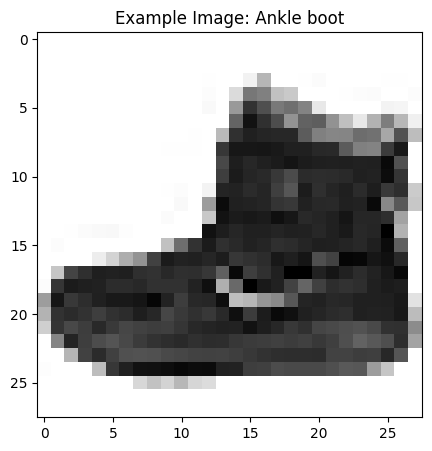

In [6]:
# Display an example image from the dataset
plt.figure(figsize=(5,5))  # Set figure size
plt.imshow(train_images[0], cmap=plt.cm.binary)  # Show first image in grayscale
plt.title(f"Example Image: {class_names[train_labels[0]]}")  # Show label name
plt.show()

In [7]:
# Build a simple neural network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into 1D array (784 pixels)
    keras.layers.Dense(128, activation='relu'),  # Fully connected hidden layer with 128 neurons (ReLU activation)
    keras.layers.Dense(10, activation='softmax')  # Output layer (10 neurons, one for each category, using softmax)
])

C:\Users\samik\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Compile the model (Define optimizer, loss function, and evaluation metric)
model.compile(optimizer='adam',  # Adam optimizer for adaptive learning rate
              loss='sparse_categorical_crossentropy',  # Suitable loss function for multi-class classification
              metrics=['accuracy'])  # Measure model performance using accuracy

In [9]:
# Train the model
model.fit(train_images, train_labels, epochs=10)  # Train on training data for 10 epochs

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7820 - loss: 0.6246
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8620 - loss: 0.3814
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8759 - loss: 0.3426
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8839 - loss: 0.3177
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8905 - loss: 0.2918
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8988 - loss: 0.2754
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9018 - loss: 0.2612
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9055 - loss: 0.2547
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9096 - loss: 0.2439
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9113 - loss: 0.2353


In [10]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest Accuracy: {test_acc:.4f}")  # Print test accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8776 - loss: 0.3375

Test Accuracy: 0.8798


In [11]:
# Make predictions on test images
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


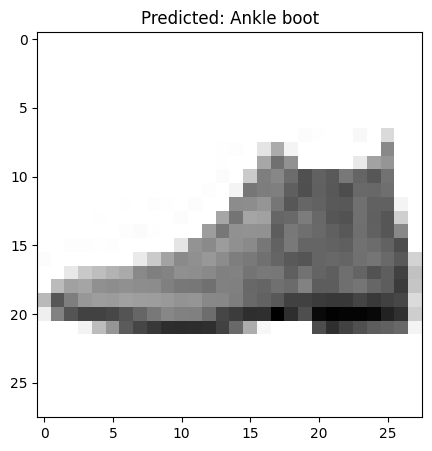

In [42]:
# Display a test image with model's predicted label
plt.figure(figsize=(5,5))
plt.imshow(test_images[0], cmap=plt.cm.binary)  # Show first test image
plt.title(f"Predicted: {class_names[predictions[0].argmax()]}")  # Show predicted class
plt.show()